# Lab session 4 (Part Of Speech) - ILTH

**Students:** Lauren Tucker & Mario Rosas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Zab4CR1_eNoeabGrNN9wRaY_7pRcFuzs?usp=sharing)

In [ ]:
!pip install python-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 28.7 MB/s 


In [ ]:
import nltk
import pycrfsuite
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [ ]:
train_data = nltk.corpus.treebank.tagged_sents()[:3000]
test_data = nltk.corpus.treebank.tagged_sents()[3000:]

In [ ]:
def train_models(amount_data):
  pbar = tqdm(total=100)
  test_data = nltk.corpus.treebank.tagged_sents()[3000:]
  total_results = {'HMM': [], 'TnT':[], 'PER':[], 'CRF':[]}
  times = {'HMM': [], 'TnT':[], 'PER':[], 'CRF':[]}

  for i in tqdm(amount_data):
    train_data = nltk.corpus.treebank.tagged_sents()[:i]

    # Hidden Markov Model
    time_before = time.time()
    trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
    HMM = trainer.train_supervised(train_data)
    total_results['HMM'].append(round(HMM.evaluate(test_data), 3))
    times['HMM'].append(time.time() - time_before)

    # Trigrams'n'Tags
    time_before = time.time()
    TnT = nltk.tag.tnt.TnT()
    TnT.train(train_data)
    total_results['TnT'].append(round(TnT.evaluate(test_data), 3))
    times['TnT'].append(time.time() - time_before)

    #  Perceptron tagger
    time_before = time.time()
    PER = nltk.tag.perceptron.PerceptronTagger(load=False)
    PER.train(train_data)
    total_results['PER'].append(round(PER.evaluate(test_data), 3))
    times['PER'].append(time.time() - time_before)

    # Conditional Random Fields
    time_before = time.time()
    CRF = nltk.tag.CRFTagger()
    CRF.train(train_data,'crf_tagger_model')
    total_results['CRF'].append(round(CRF.evaluate(test_data), 3))
    times['CRF'].append(time.time() - time_before)

    print(i)

  return times, total_results



In [ ]:
train_dict = train_models([500,1000,1500,2000,2500,3000])

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.

 17%|█▋        | 1/6 [00:29<02:25, 29.10s/it]

500



 33%|███▎      | 2/6 [01:39<03:34, 53.55s/it]

1000



 50%|█████     | 3/6 [03:37<04:09, 83.04s/it]

1500



 67%|██████▋   | 4/6 [05:47<03:22, 101.23s/it]

2000



 83%|████████▎ | 5/6 [08:15<01:58, 118.32s/it]

2500



  0%|          | 0/100 [10:58<?, ?it/s]

3000


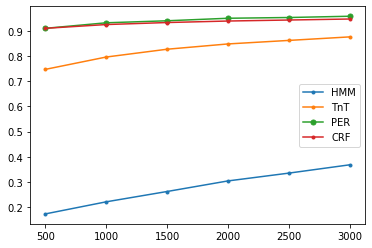

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(train_dict[1])

plt.plot([500,1000,1500,2000,2500,3000], 'HMM', data=df, marker='.')
plt.plot([500,1000,1500,2000,2500,3000], 'TnT', data=df, marker='.')
plt.plot([500,1000,1500,2000,2500,3000], 'PER', data=df, marker='.', markersize = 10)
plt.plot([500,1000,1500,2000,2500,3000], 'CRF', data=df, marker='.')

plt.legend()
plt.show()

Below is a table containing the duration of each training and evaluation operation to compare the efficiency of each algorithm to aid in choosing the best performing option.

In [ ]:
df_times = pd.DataFrame.from_dict(train_dict[0]).round(3)
df_times['Sentences'] = [500,1000,1500,2000,2500,3000]
df_times

,HMM,TnT,PER,CRF,Sentences
0,5.803,14.467,4.563,4.112,500
1,6.514,44.379,8.010,11.467,1000
2,9.698,76.624,13.312,17.617,1500
3,7.538,79.957,13.839,27.139,2000
4,7.953,85.684,16.070,38.152,2500
5,8.356,88.253,18.333,45.394,3000


# Conclusions
- Which model would you select? Justify the answer.

We would select the perceptron tagger model. One reason is that it performs extremeley well even with smaller amounts of data (i.e. with only 500 sentences). Another reason is that it is relatively fast. Among the four models tested, the only model that ran faster than the Perceptron Tagger was the Hidden Markov Model. However, HMM had significantly worse performance, even with large amounts of data. Therefore, the small increase in duration is worth the large increase in performance.

TnT is not a bad model, but it is outperformed both in time and performance by PER and CRF. CRF's performance is almost comparable to PER, however, the time it takes to compute is almost three times as long as PER.

**